In [1]:
library('tidyverse')

options(repr.plot.width = 4, repr.plot.height = 3, repr.plot.res = 300)

── Attaching packages ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.3     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



# Strings

In [2]:
this_is_a_string = "something"

this_is_a_string

[1] "something"

# Numbers

In [3]:
this_is_a_number = 12

this_is_a_number

[1] 12

# Booleans

In [4]:
this_is_a_boolean = TRUE

this_is_a_boolean

[1] TRUE

# Vectors

In [5]:
a = 'a'

In [6]:
print(a)

[1] "a"


### 🚨`c` is a function 🚨

In [7]:
b = c('a', 'b')

In [8]:
print(b)

[1] "a" "b"


# Data Frames and Tibbles

```
Tibble (or Data Frame)
    Vectors
        Strings/Numbers/Booleans
```

In [9]:
this_is_a_tibble = tibble(
    this_is_a_bool_column = c('TRUE', 'FALSE', 'FALSE'),
    another_column = c(1, 2, 3)
)

this_is_a_tibble  # try with data.frame

this_is_a_bool_column,another_column
<chr>,<dbl>
TRUE,1
FALSE,2
FALSE,3


# Factors

In [10]:
b = c('a', 'b', 'b')

In [11]:
print(b)

[1] "a" "b" "b"


In [12]:
b_factor = factor(b)

b_factor

[1] a b b
Levels: a b

In [13]:
sort(b_factor)

[1] a b b
Levels: a b

In [14]:
b_factor2 = factor(b, levels = c('b', 'a'))

b_factor2

[1] a b b
Levels: b a

What's going to happen here 👇?

In [15]:
sort(b_factor2)

[1] b b a
Levels: b a

How can we use this for visualization?

In [16]:
as.numeric(b_factor)

[1] 1 2 2

# `read.csv`

In [17]:
df = read.csv(
    'https://raw.githubusercontent.com/chuckpr/BIOS512/main/in-class-exercises/data/marathon.csv',
    stringsAsFactors=FALSE
)

In [18]:
df %>% head

,year,name,country,time,race.time,MF,country.simple
,<int>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>
1,2019,Lawrence Cherono,Kenya,2H 7M 57S,2.132500,Men's,Kenya
2,2018,Yuki Kawauchi,Japan,2H 15M 58S,2.266111,Men's,Japan
3,2017,Geoffrey Kirui,Kenya,2H 9M 37S,2.160278,Men's,Kenya
4,2016,Lemi Berhanu,Ethiopia,2H 12M 45S,2.212500,Men's,Ethiopia
5,2015,Lelisa Desisa,Ethiopia,2H 9M 17S,2.154722,Men's,Ethiopia
6,2014,"Mebrahtom ""Meb"" Keflezighi",United States,2H 8M 37S,2.143611,Men's,United States


In [19]:
# levels(df$name)

`stringsAsFactors = FALSE`

In [20]:
df = read.csv(
    'https://raw.githubusercontent.com/chuckpr/BIOS512/main/in-class-exercises/data/marathon.csv',
    stringsAsFactors = FALSE
)

In [21]:
df %>% head

,year,name,country,time,race.time,MF,country.simple
,<int>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>
1,2019,Lawrence Cherono,Kenya,2H 7M 57S,2.132500,Men's,Kenya
2,2018,Yuki Kawauchi,Japan,2H 15M 58S,2.266111,Men's,Japan
3,2017,Geoffrey Kirui,Kenya,2H 9M 37S,2.160278,Men's,Kenya
4,2016,Lemi Berhanu,Ethiopia,2H 12M 45S,2.212500,Men's,Ethiopia
5,2015,Lelisa Desisa,Ethiopia,2H 9M 17S,2.154722,Men's,Ethiopia
6,2014,"Mebrahtom ""Meb"" Keflezighi",United States,2H 8M 37S,2.143611,Men's,United States


# `read_csv`

In [22]:
df = read_csv(
    'https://raw.githubusercontent.com/chuckpr/BIOS512/main/in-class-exercises/data/marathon.csv',
    col_types = cols()
)

In [23]:
df %>% print(n =10, width = Inf)

# A tibble: 171 × 7
    year name                           country       time       race.time MF   
   <dbl> <chr>                          <chr>         <chr>          <dbl> <chr>
 1  2019 "Lawrence Cherono"             Kenya         2H 7M 57S       2.13 Men's
 2  2018 "Yuki Kawauchi"                Japan         2H 15M 58S      2.27 Men's
 3  2017 "Geoffrey Kirui"               Kenya         2H 9M 37S       2.16 Men's
 4  2016 "Lemi Berhanu"                 Ethiopia      2H 12M 45S      2.21 Men's
 5  2015 "Lelisa Desisa"                Ethiopia      2H 9M 17S       2.15 Men's
 6  2014 "Mebrahtom \"Meb\" Keflezighi" United States 2H 8M 37S       2.14 Men's
 7  2013 "Lelisa Desisa"                Ethiopia      2H 10M 22S      2.17 Men's
 8  2012 "Wesley Korir"                 Kenya         2H 12M 40S      2.21 Men's
 9  2011 "Geoffrey Mutai"               Kenya         2H 3M 2S        2.05 Men's
10  2010 "Robert Kiprono Cheruiyot"     Kenya         2H 5M 52S       2.10 Men's
   count

# forcats

In [24]:
# ?forcats

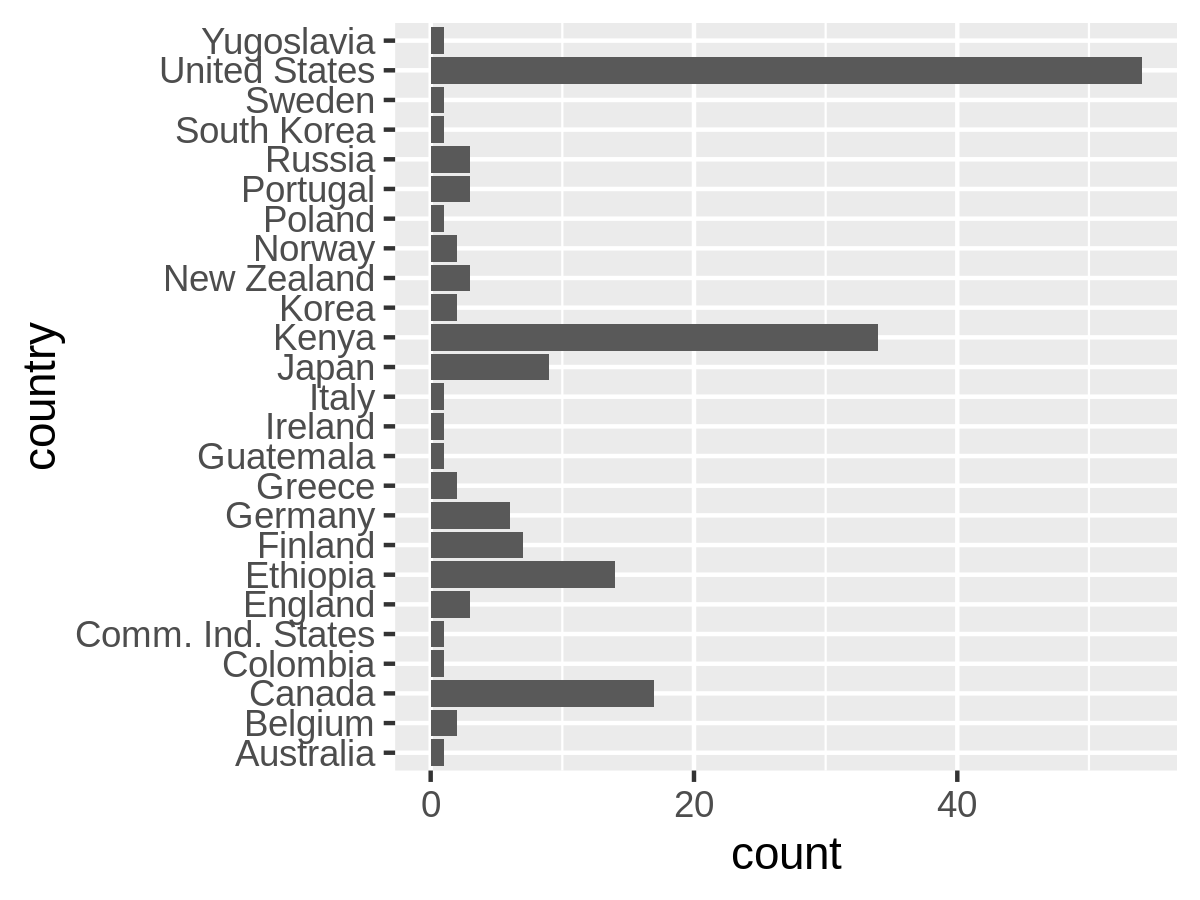

In [25]:
p = ggplot(df, aes(y = country))

p = p + geom_bar()

p

## Order by frequency

## `fct_infreq` and (`fct_rev`)

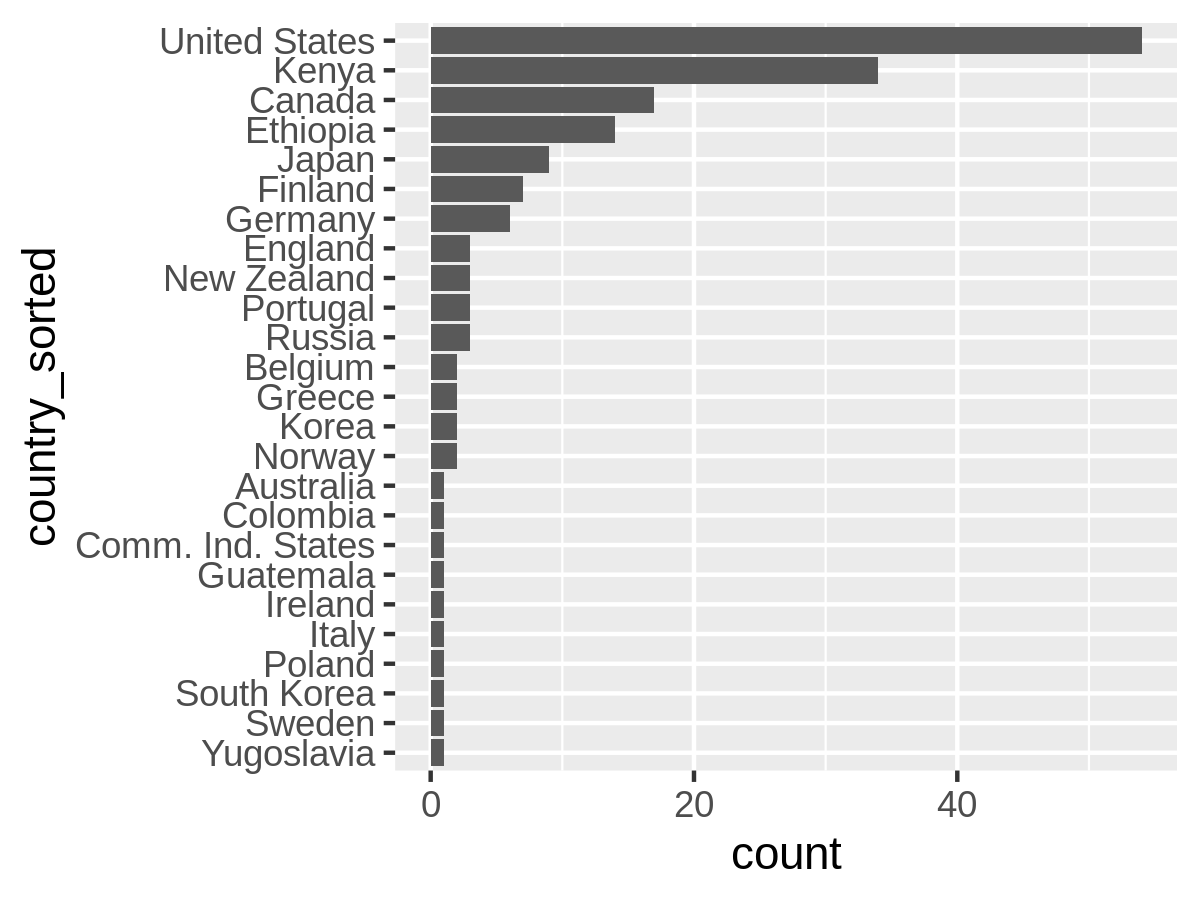

In [26]:
df_sorted = df %>%
    mutate(country_sorted = country %>% fct_infreq() %>% fct_rev())  # try with fct_rev

p = ggplot(df_sorted, aes(x = country_sorted))

p = p + geom_bar() + coord_flip()

p

In [27]:
df %>% 
    pull(country) %>%
    fct_infreq() %>%
    fct_rev()

[1] Kenya             Japan             Kenya             Ethiopia         
  [5] Ethiopia          United States     Ethiopia          Kenya            
  [9] Kenya             Kenya             Ethiopia          Kenya            
 [13] Kenya             Kenya             Ethiopia          Kenya            
 [17] Kenya             Kenya             South Korea       Kenya            
 [21] Kenya             Kenya             Kenya             Kenya            
 [25] Kenya             Kenya             Kenya             Kenya            
 [29] Kenya             Italy             Ethiopia          Kenya            
 [33] Japan             Australia         England           England          
 [37] United States     United States     Japan             United States    
 [41] United States     United States     Canada            United States    
 [45] United States     Ireland           United States     Finland          
 [49] Colombia          England           Japan             United States    
 [53] New Zealand       Japan             Japan             Belgium          
 [57] Belgium           Finland           Finland           Finland          
 [61] Finland           Yugoslavia        United States     Finland          
 [65] Japan             Finland           Japan             Guatemala        
 [69] Japan             Korea             Sweden            Canada           
 [73] Korea             Greece            United States     Canada           
 [77] Canada            United States     United States     Canada           
 [81] United States     United States     Canada            United States    
 [85] United States     Canada            United States     Germany          
 [89] United States     United States     Canada            United States    
 [93] United States     Canada            United States     United States    
 [97] United States     United States     United States     Greece           
[101] United States     United States     United States     United States    
[105] Canada            Canada            United States     United States    
[109] United States     Canada            United States     United States    
[113] Canada            United States     United States     United States    
[117] United States     United States     Canada            Canada           
[121] United States     Canada            United States     Ethiopia         
[125] United States     Kenya             Ethiopia          Kenya            
[129] Ethiopia          Kenya             Kenya             Kenya            
[133] Ethiopia          Kenya             Ethiopia          Russia           
[137] Kenya             Kenya             Kenya             Russia           
[141] Kenya             Kenya             Kenya             Ethiopia         
[145] Ethiopia          Ethiopia          Germany           Germany          
[149] Germany           Russia            Comm. Ind. States Poland           
[153] Portugal          Norway            Portugal          Portugal         
[157] Norway            United States     New Zealand       United States    
[161] Germany           New Zealand       Canada            United States    
[165] United States     United States     United States     Germany          
[169] United States     United States     United States    
25 Levels: Yugoslavia Sweden South Korea Poland Italy Ireland ... United States

In [28]:
df %>% 
    pull(country) %>%
    fct_infreq() %>%
    fct_rev() %>%
    levels()

[1] "Yugoslavia"        "Sweden"            "South Korea"      
 [4] "Poland"            "Italy"             "Ireland"          
 [7] "Guatemala"         "Comm. Ind. States" "Colombia"         
[10] "Australia"         "Norway"            "Korea"            
[13] "Greece"            "Belgium"           "Russia"           
[16] "Portugal"          "New Zealand"       "England"          
[19] "Germany"           "Finland"           "Japan"            
[22] "Ethiopia"          "Canada"            "Kenya"            
[25] "United States"

## `fct_inorder` (use with `arrange`)

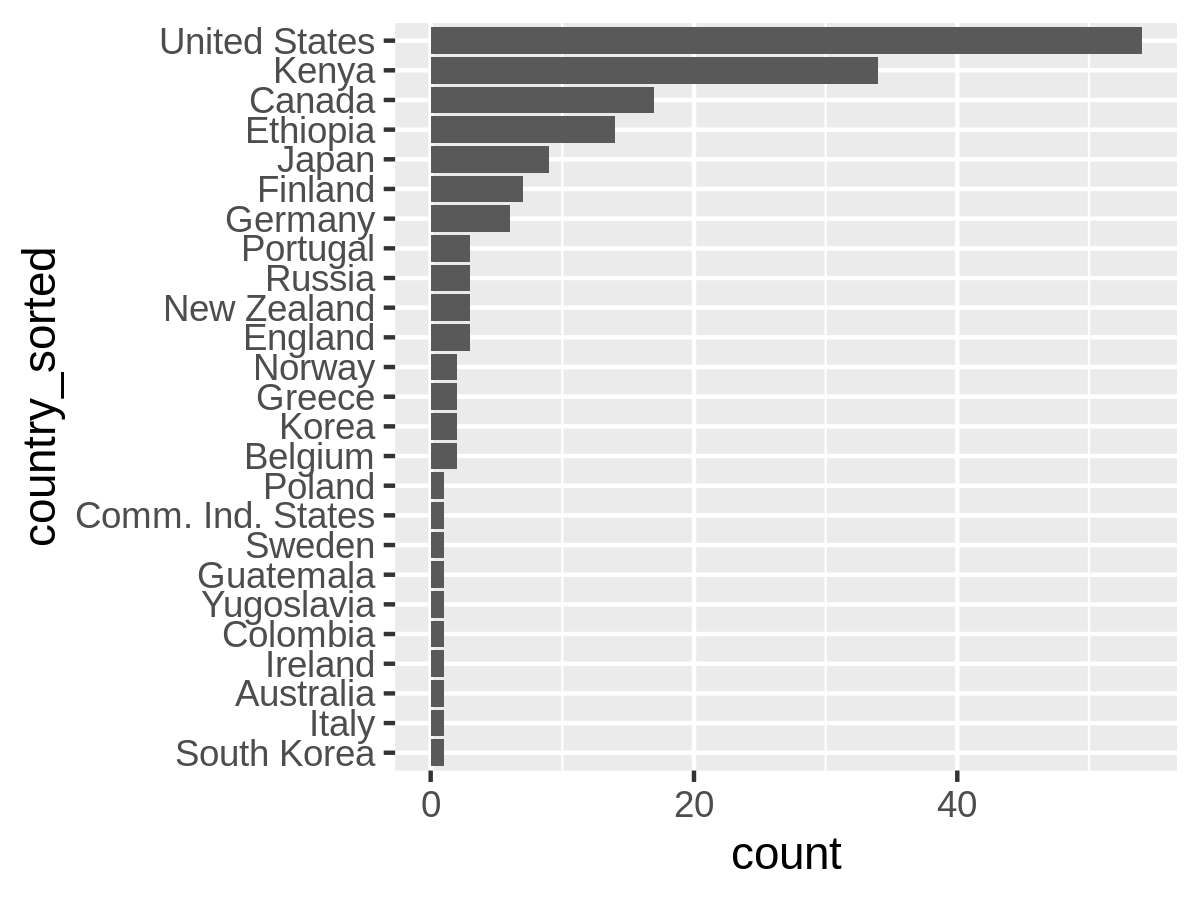

In [29]:
df_sorted = df %>%
    group_by(country) %>%
    mutate(n = n()) %>%
    ungroup() %>% # Why do we need to ungroup?
    arrange(n) %>%
    mutate(country_sorted = fct_inorder(country))
           
p = ggplot(df_sorted, aes(x = country_sorted))

p = p + geom_bar() + coord_flip()

p

## Order by aggregate value of another column

## fct_reorder

In [30]:
df %>% print

# A tibble: 171 × 7
    year name                           country time  race.time MF    country.simple
   <dbl> <chr>                          <chr>   <chr>     <dbl> <chr> <chr>         
 1  2019 "Lawrence Cherono"             Kenya   2H 7…      2.13 Men's Kenya         
 2  2018 "Yuki Kawauchi"                Japan   2H 1…      2.27 Men's Japan         
 3  2017 "Geoffrey Kirui"               Kenya   2H 9…      2.16 Men's Kenya         
 4  2016 "Lemi Berhanu"                 Ethiop… 2H 1…      2.21 Men's Ethiopia      
 5  2015 "Lelisa Desisa"                Ethiop… 2H 9…      2.15 Men's Ethiopia      
 6  2014 "Mebrahtom \"Meb\" Keflezighi" United… 2H 8…      2.14 Men's United States 
 7  2013 "Lelisa Desisa"                Ethiop… 2H 1…      2.17 Men's Ethiopia      
 8  2012 "Wesley Korir"                 Kenya   2H 1…      2.21 Men's Kenya         
 9  2011 "Geoffrey Mutai"               Kenya   2H 3…      2.05 Men's Kenya         
10  2010 "Robert Kiprono Cheruiyot"     Kenya

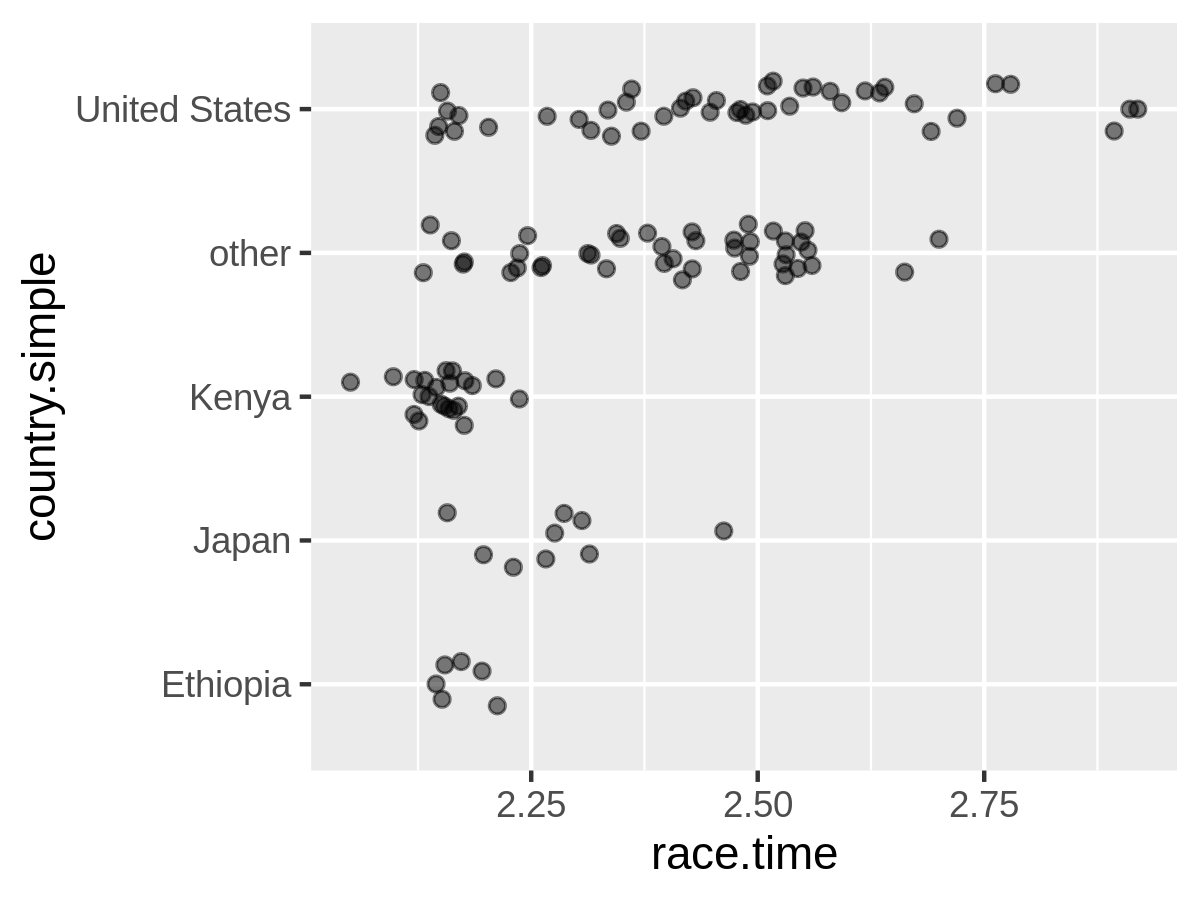

In [31]:
p = ggplot(df %>% filter(MF == "Men's"), aes(x = race.time, y = country.simple))

p = p + geom_point(position = position_jitter(h = 0.2), alpha = 0.5)

p

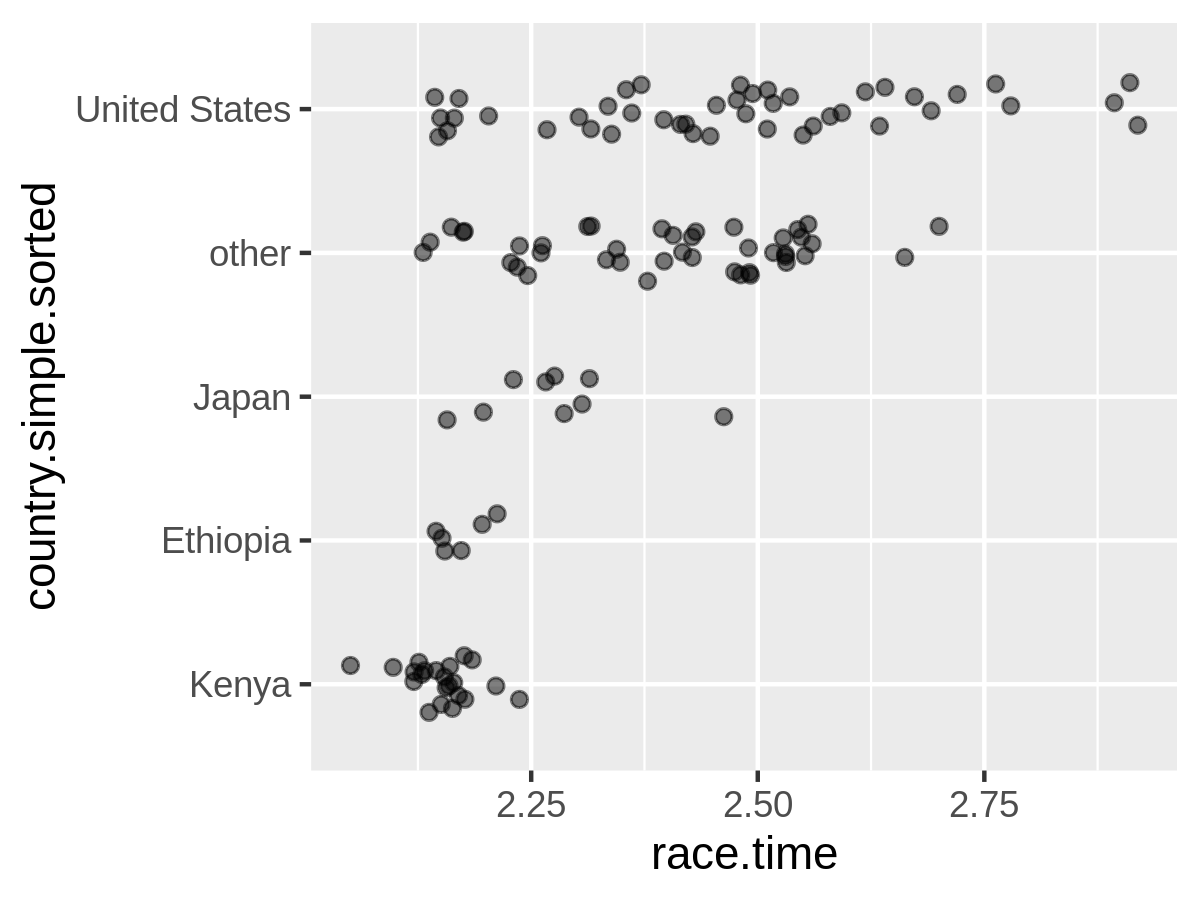

In [32]:
df_sorted = df %>%
    filter(MF == "Men's") %>%
    mutate(country.simple.sorted = fct_reorder(country.simple, race.time, median))

p = ggplot(df_sorted, aes(x = race.time, y = country.simple.sorted))

p = p + geom_point(position = position_jitter(h = 0.2), alpha = 0.5)

p

## `fct_lump` Lump low frequency categories

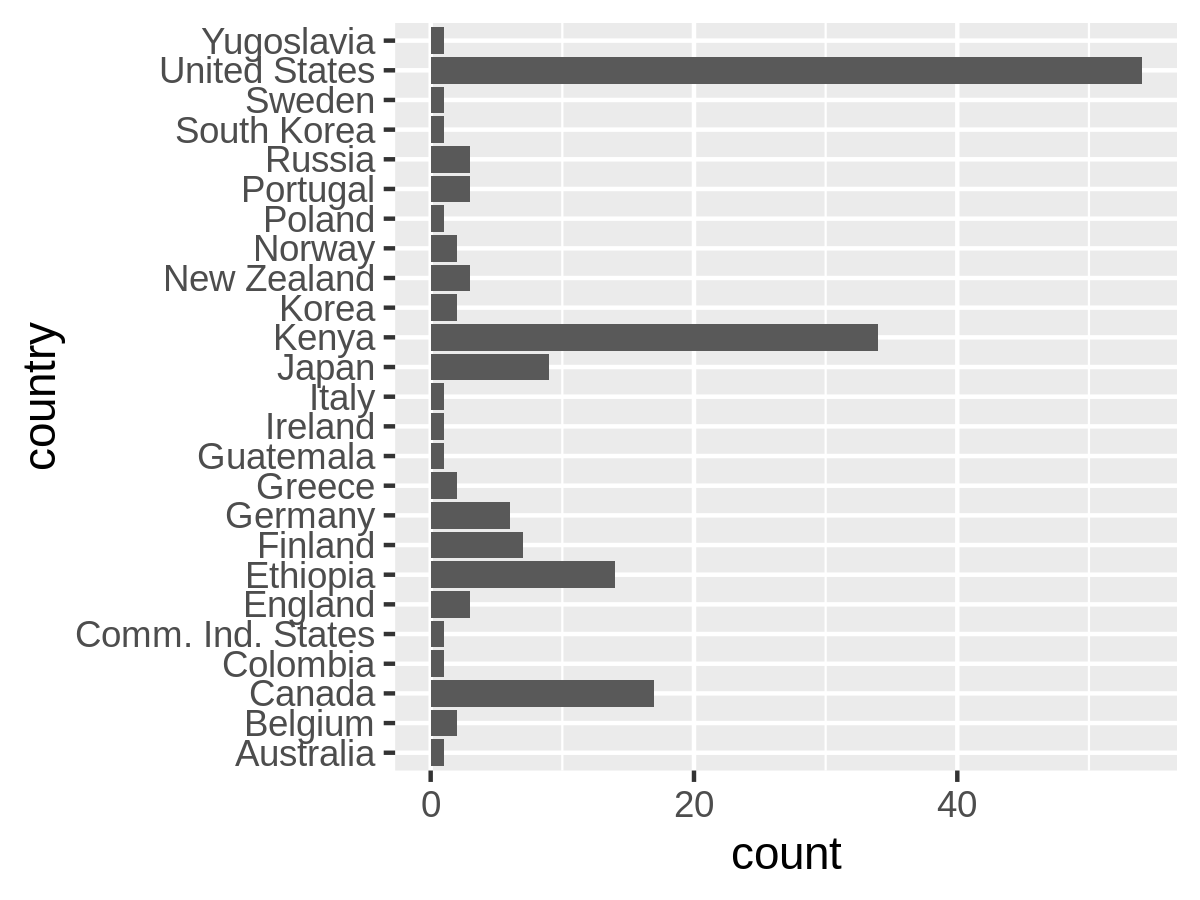

In [33]:
p = ggplot(df, aes(y = country))

p = p + geom_bar()

p

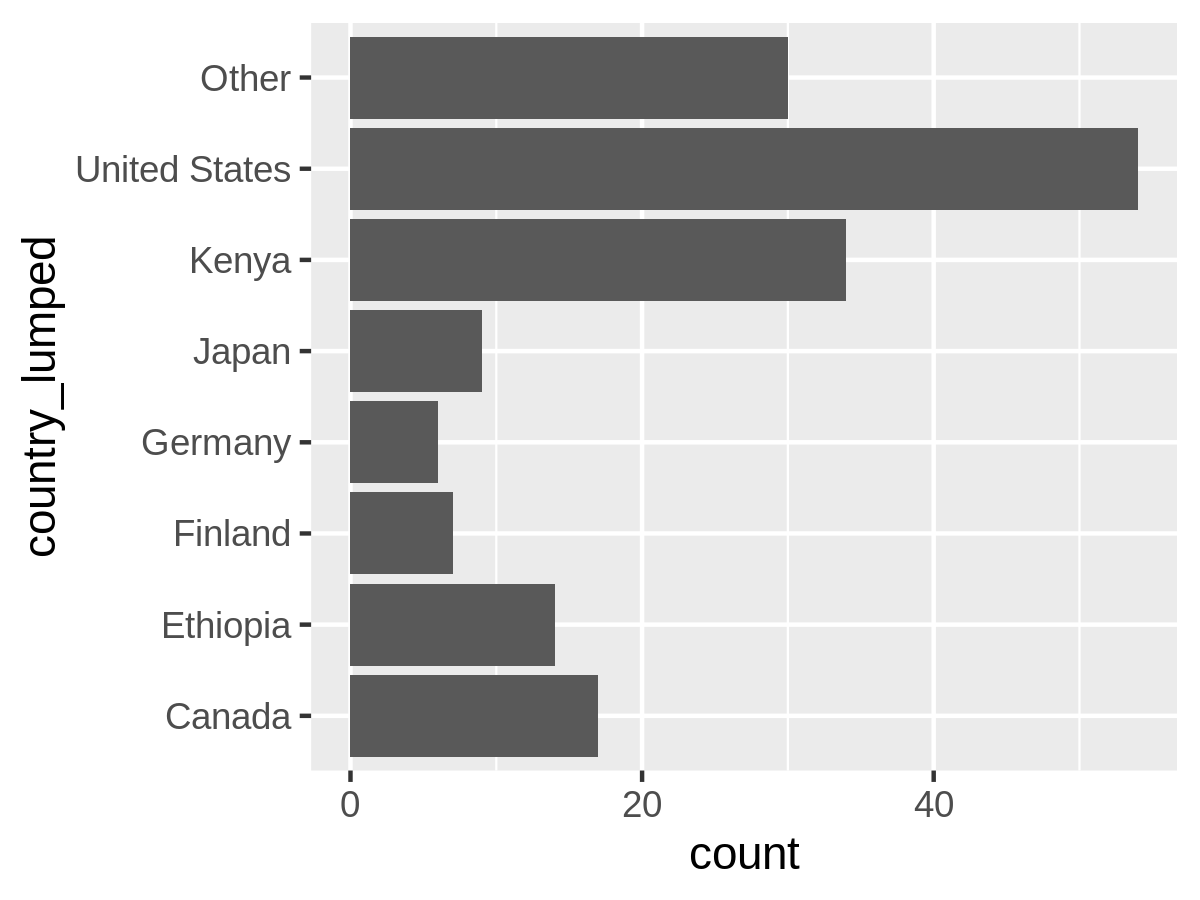

In [34]:
df_lumped = df %>%
    mutate(country_lumped = country %>% fct_lump(n = 7)) # add fct_infreq and fct_rev

p = ggplot(df_lumped, aes(y = country_lumped))

p = p + geom_bar()

p

In [35]:
df_lumped %>% pull(country_lumped) %>% levels()

[1] "Canada"        "Ethiopia"      "Finland"       "Germany"      
[5] "Japan"         "Kenya"         "United States" "Other"

## `fct_relevel` set by hand

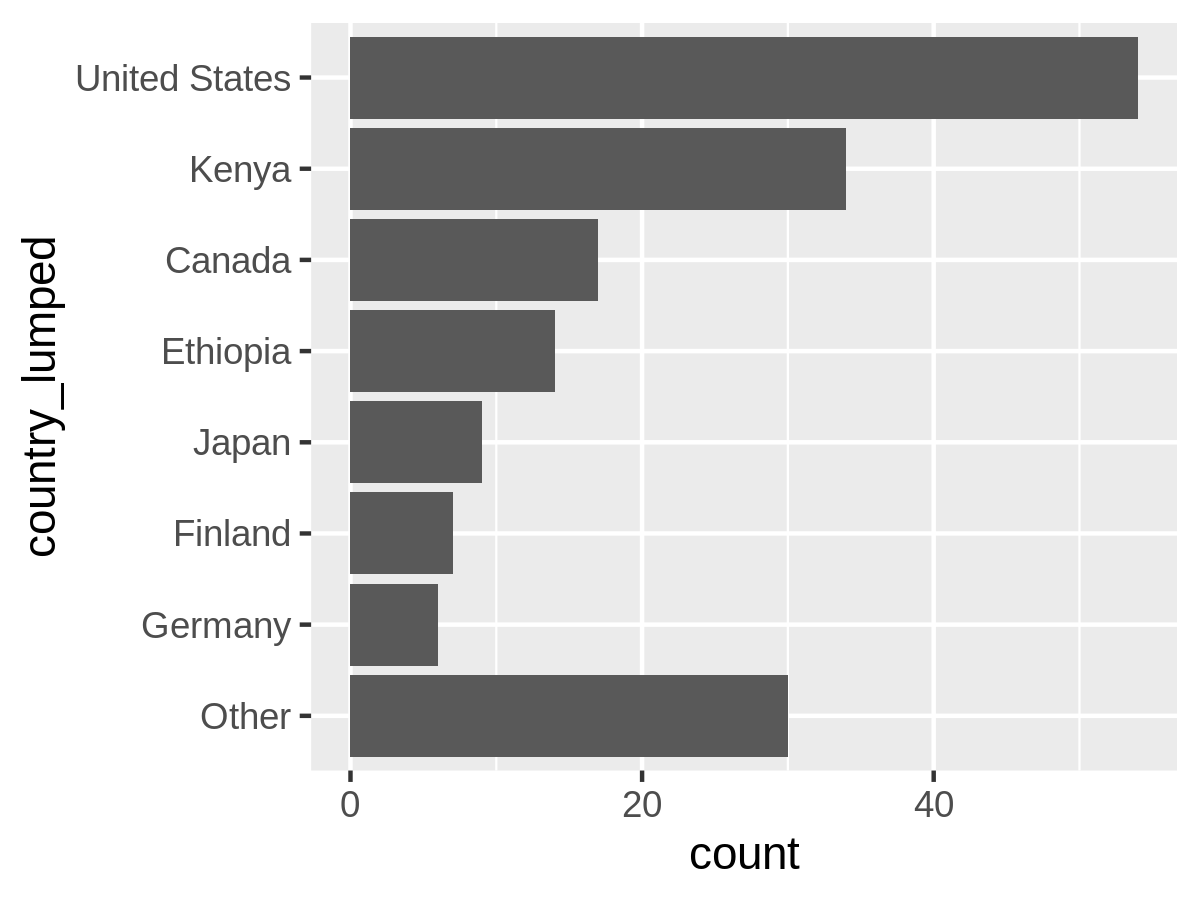

In [36]:
df_lumped = df %>%
    mutate(country_lumped = country %>% 
           fct_lump(n = 7) %>% 
           fct_infreq() %>% 
           fct_relevel('Other', after= Inf) %>%
           fct_rev()
    )

p = ggplot(df_lumped, aes(y = country_lumped))

p = p + geom_bar()

p